In [6]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [12]:
tickers = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/sp500.csv")
#tickers = tickers[['Symbol']]
#tickers

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
500,XYL
501,YUM
502,ZBH
503,ZION


In [7]:
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

prices = yf.download(tickers, start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  502 of 502 completed

2 Failed downloads:
- MSI: No data found for this date range, symbol may be delisted
- COP: No data found for this date range, symbol may be delisted


In [16]:
from google.colab import files

prices.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/sp500_dados.csv")

In [8]:

rs = prices.apply(np.log).diff(1)
prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,84.666748,28.982893,155.478271,74.207466,79.461990,82.064140,168.809998,84.001160,203.776108,334.429993,...,142.405029,59.934875,61.174892,56.203197,77.805450,98.132988,142.509003,259.140015,49.020844,132.200851
2020-01-03,83.307343,27.548195,155.488022,73.486023,78.707764,81.032082,166.820007,82.977119,203.436722,331.809998,...,140.292755,60.223114,60.683083,55.581242,78.263412,97.825630,142.136475,256.049988,48.329094,132.220566
2020-01-06,83.553619,27.219410,152.932632,74.071579,79.328896,82.218468,179.039993,83.411850,202.108276,333.709991,...,140.015091,60.136642,61.149014,55.887280,77.756737,97.768005,141.315063,258.010010,47.740170,131.205460
2020-01-07,83.809738,27.119778,151.118530,73.723213,78.876328,81.630096,180.350006,82.948128,197.744766,333.390015,...,140.679504,60.011738,60.648575,56.183449,77.464417,97.940903,141.190887,256.470001,47.450378,131.648941


In [24]:
df.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,84.666740,28.982893,154.629852,73.785904,79.461998,81.815163,168.809998,84.001160,203.171127,...,142.405029,59.934875,60.554615,55.849358,77.805450,98.132996,142.509003,259.140015,49.903751,132.200836
2,2020-01-03,83.307343,27.548195,154.639526,73.068558,78.707748,80.786217,166.820007,82.977119,202.832779,...,140.292755,60.223114,60.067795,55.231319,78.263412,97.825638,142.136490,256.049988,49.199547,132.220566
3,2020-01-06,83.553612,27.219410,152.098099,73.650787,79.328896,81.969009,179.039993,83.411850,201.508270,...,140.015091,60.136642,60.529003,55.535435,77.756737,97.768013,141.315063,258.010010,48.600010,131.205444
4,2020-01-07,83.809738,27.119778,150.293854,73.304413,78.876335,81.382408,180.350006,82.948128,197.157684,...,140.679504,60.011738,60.033634,55.829739,77.464417,97.940903,141.190887,256.470001,48.305000,131.648941


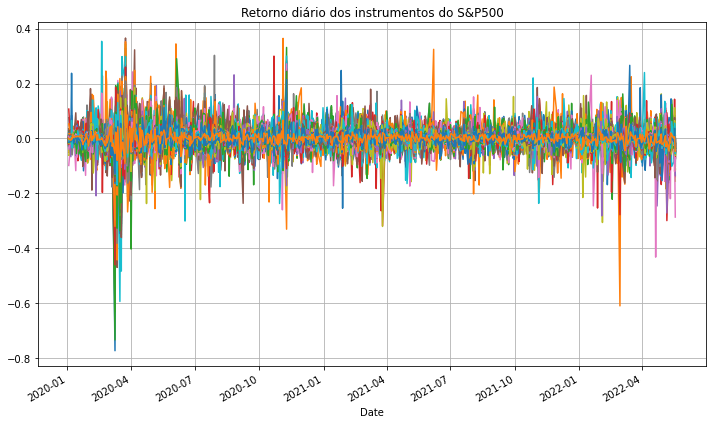

In [9]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Retorno diário dos instrumentos do S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

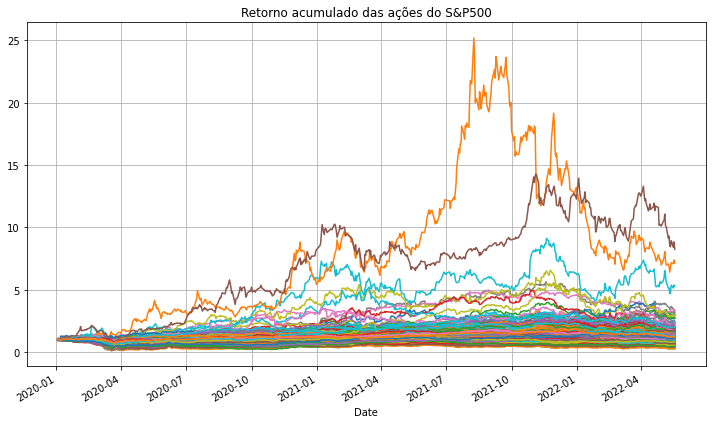

In [10]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Retorno acumulado das ações do S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

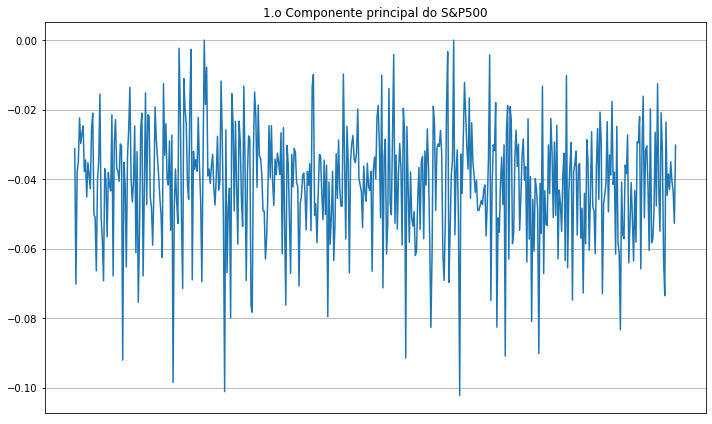

In [11]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='1.o Componente principal do S&P500')
plt.tight_layout()
plt.savefig('tmp.png')


In [19]:
#weights = abs(pc1)/sum(abs(pc1))
#myrs = (weights*rs).sum(1)
#myrs.cumsum().apply(np.exp).plot()
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 
#rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
#rs_df.columns = ["PCA Portfolio", "S&P500"]


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


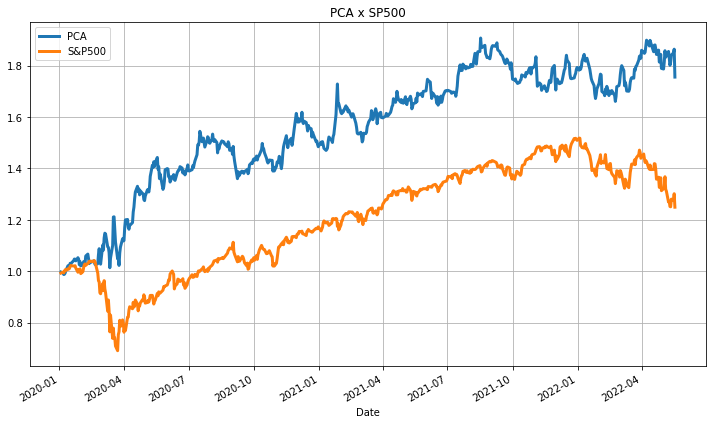

In [24]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

indice = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

ws = [-1,]*10+[1,]*10
myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA x SP500')
indice['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA', 'S&P500'])

plt.tight_layout()
plt.savefig('tmp.png')